# Part 1

question1

In [ ]:
from scipy.special import comb
n=10
y = 7
marginal_likelihood = 1/11

def likelihood(theta):
    return comb(n, y) * theta**y * (1 - theta)**(n - y)

def prior(theta):
    theta = np.asarray(theta)
    return np.where((theta >= 0) & (theta <= 1), 1.0, 0.0)


def posterior(theta):
    return likelihood(theta) * prior(theta) / marginal_likelihood


In [ ]:
theta_vals = [0.75, 0.25, 1.0]
posterior_estimates = {theta: posterior(theta) for theta in theta_vals}

for theta, p in posterior_estimates.items():
    print(f"{theta}: {p:.4f}")

0.75: 2.7531
0.25: 0.0340
1.0: 0.0000


question2

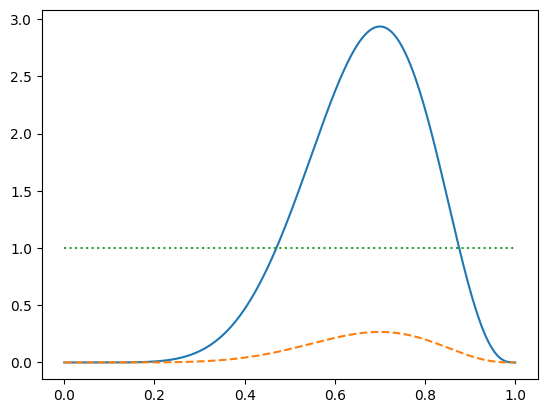

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

theta_grid = np.linspace(0, 1, 500)
posterior_grid = posterior(theta_grid)
likelihood_grid = likelihood(theta_grid)
prior_grid = [prior(t) for t in theta_grid]

plt.plot(theta_grid, posterior_grid)
plt.plot(theta_grid, likelihood_grid,linestyle="--")
plt.plot(theta_grid, prior_grid,linestyle=":")
plt.show()


In [ ]:
max_index = np.argmax(posterior_grid)
theta_max = theta_grid[max_index]
posterior_max = posterior_grid[max_index]
print(f"Theta with max posterior density: {theta_max:.4f}, density: {posterior_max:.4f}")


Theta with max posterior density: 0.6994, density: 2.9351


*part 2*


In [ ]:
from math import sqrt,e

from scipy.stats import norm
def u_post_dist(mu):
    likelihood=1
    sigma=50
    for i in [300, 270, 390, 450, 500, 290,680, 450]:
        likelihood=(likelihood/(sigma*sqrt(2*3.14)))*e**((-1/(2*sigma**2))*(i-mu)**2)

    u_post_dist=likelihood*norm.pdf(mu,loc=250,scale=25)
    return u_post_dist

In [ ]:
#(a)
u_post_dist(300)

np.float64(6.838103925536294e-41)

In [ ]:
#(b)
u_post_dist(900)

np.float64(0.0)

In [ ]:
#(c)
u_post_dist(50)

np.float64(9.711050945473145e-138)

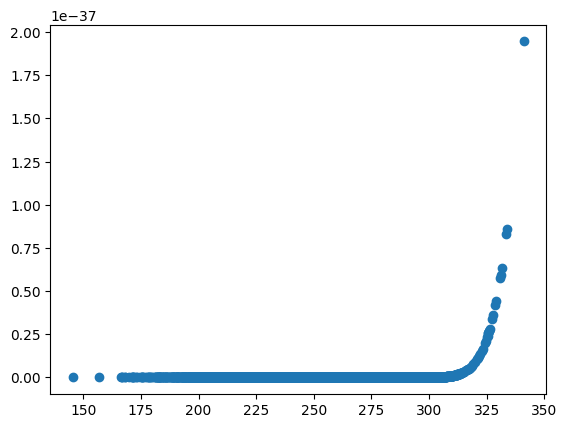

In [ ]:
mus=norm.rvs(loc=250, scale=25, size=10000)
upds=[u_post_dist(mu) for mu in mus]
plt.scatter(mus,upds)

*Part 4*

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/yadavhimanshu059/CGS698C/main/notes/Module-2/recognition.csv"
dat = pd.read_csv(url).iloc[:, 1:]  # Drop index column
Tw = dat['Tw'].values
Tnw = dat['Tnw'].values

*4.5.1*

In [ ]:
import numpy as np
from scipy.stats import norm, truncnorm

STD_DEV = 60

def mu_prior(mu_val):
    return norm(loc=300, scale=50).pdf(mu_val)

def delta_prior(delta_val):
    return truncnorm(a=0, b=np.inf, loc=0, scale=50).pdf(delta_val)

def posterior_unnormalized(mu_val, delta_val, T_w, T_nw):
    like_w = norm(loc=mu_val, scale=STD_DEV).pdf(T_w)
    like_nw = norm(loc=mu_val + delta_val, scale=STD_DEV).pdf(T_nw)
    likelihood = np.prod(like_w) * np.prod(like_nw)
    prior = mu_prior(mu_val) * delta_prior(delta_val)
    return likelihood * prior



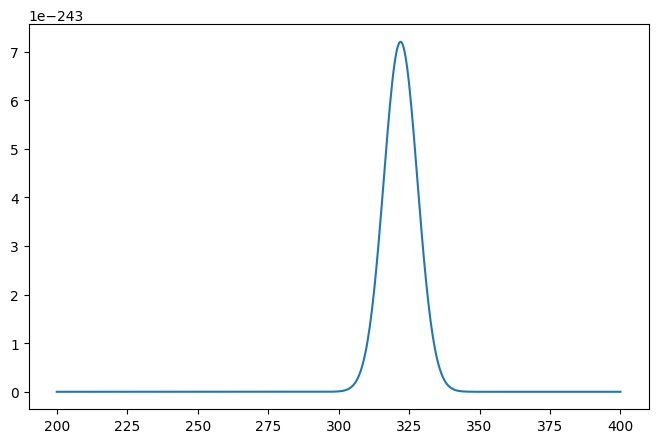

In [ ]:
import matplotlib.pyplot as plt

mu_grid = np.linspace(200, 400, 500)
post_vals = [posterior_unnormalized(mu, 0, Tw, Tnw) for mu in mu_grid]

plt.figure(figsize=(8, 5))
plt.plot(mu_grid, post_vals)
plt.show()



*4.5.2*

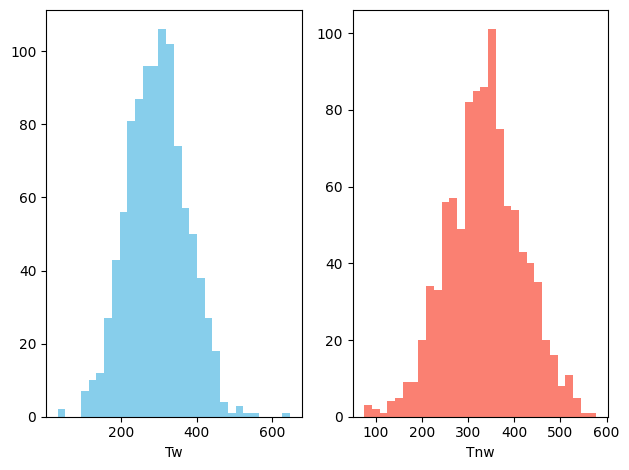

In [ ]:
N = 1000
mu_sim = np.random.normal(300, 50, N)
delta_sim = truncnorm(0, np.inf, loc=0, scale=50).rvs(N)
Tw_gen = np.random.normal(mu_sim, STD_DEV)
Tnw_gen = np.random.normal(mu_sim + delta_sim, STD_DEV)

plt.subplot(1, 2, 1)
plt.hist(Tw_gen, bins=30, color='skyblue')
plt.xlabel('Tw')

plt.subplot(1, 2, 2)
plt.hist(Tnw_gen, bins=30, color='salmon')
plt.xlabel('Tnw')

plt.tight_layout()
plt.show()


*4.5.3*

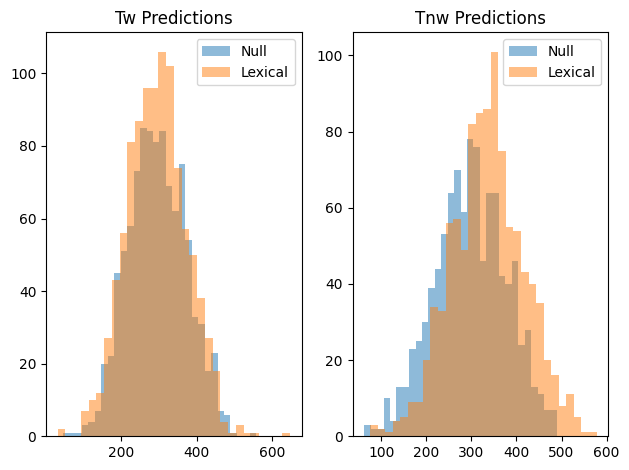

In [ ]:
Tw_null_sim = np.random.normal(mu_sim, STD_DEV)
Tnw_null_sim = np.random.normal(mu_sim, STD_DEV)


plt.subplot(1, 2, 1)
plt.hist(Tw_null_sim, bins=30, alpha=0.5, label='Null')
plt.hist(Tw_gen, bins=30, alpha=0.5, label='Lexical')
plt.title('Tw Predictions')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(Tnw_null_sim, bins=30, alpha=0.5, label='Null')
plt.hist(Tnw_gen, bins=30, alpha=0.5, label='Lexical')
plt.title('Tnw Predictions')
plt.legend()

plt.tight_layout()
plt.show()


*4.5.4*

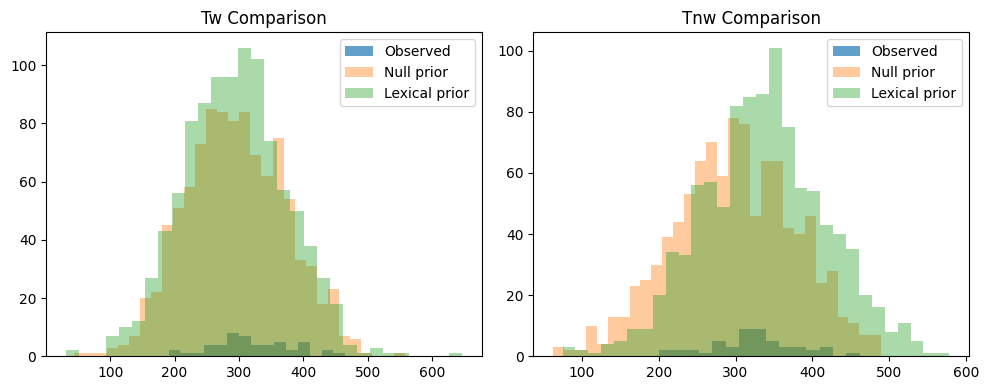

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(Tw, bins=15, alpha=0.7, label='Observed')
plt.hist(Tw_null_sim, bins=30, alpha=0.4, label='Null prior')
plt.hist(Tw_gen, bins=30, alpha=0.4, label='Lexical prior')
plt.title('Tw Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(Tnw, bins=15, alpha=0.7, label='Observed')
plt.hist(Tnw_null_sim, bins=30, alpha=0.4, label='Null prior')
plt.hist(Tnw_gen, bins=30, alpha=0.4, label='Lexical prior')
plt.title('Tnw Comparison')
plt.legend()

plt.tight_layout()
plt.show()


*4.5.5*

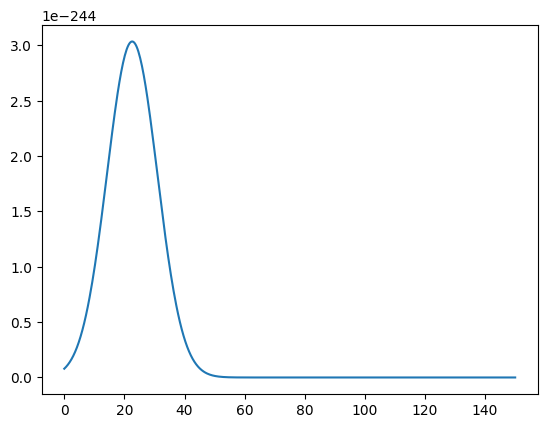

In [ ]:
delta_grid = np.linspace(0, 150, 500)
post_delta = [posterior_unnormalized(300, d, Tw, Tnw) for d in delta_grid]

plt.plot(delta_grid, post_delta)
plt.show()
